In [4]:
# importing required modules

import pandas as pd
import numpy as np
import random
from pandas import Timestamp
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

import time
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE


In [7]:
# Loading Document Embeddings data

df = pd.read_csv('./data/embeddings_gensim.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35965 entries, 0 to 35964
Data columns (total 59 columns):
Unnamed: 0       35965 non-null int64
collection_id    35965 non-null object
sequence_id      35965 non-null int64
resource_id      35965 non-null object
title            35965 non-null object
description      35965 non-null object
is_deleted       35965 non-null object
text             35965 non-null object
embeddings       35965 non-null object
vec_1            35965 non-null float64
vec_2            35965 non-null float64
vec_3            35965 non-null float64
vec_4            35965 non-null float64
vec_5            35965 non-null float64
vec_6            35965 non-null float64
vec_7            35965 non-null float64
vec_8            35965 non-null float64
vec_9            35965 non-null float64
vec_10           35965 non-null float64
vec_11           35965 non-null float64
vec_12           35965 non-null float64
vec_13           35965 non-null float64
vec_14           35965

In [8]:
# Droping unnecessary columns

df.columns
df.drop(['Unnamed: 0'],inplace = True,axis = 1)

In [9]:
# valid resources
# 0008d66a-753f-4639-8634-81bb3abb3269 ->linear equation
# 001bf2c6-8ede-478a-9b8b-d7750488cb1b  -> addition and subtraction 
# 0025274f-8826-472b-9ea5-16b55bad990d ->constructing box whisker plot
# 00b3d9ad-8df6-4144-ad09-a469144b9075 -> pythagorean theorem
# 015de589-5d6d-4678-8424-5711d4836bf2 -> homework

In [10]:
# valid resources list
collection_list =['0008d66a-753f-4639-8634-81bb3abb3269' ,'001bf2c6-8ede-478a-9b8b-d7750488cb1b' ,
                  '0025274f-8826-472b-9ea5-16b55bad990d','00b3d9ad-8df6-4144-ad09-a469144b9075',
                  '015de589-5d6d-4678-8424-5711d4836bf2',
                 ]

In [11]:

# no_of_learning_resources = 4
# seed =123

# #  list of collections with more than minimum no of resources
# minimum_no_resources = 8
# collection_list = df[df.sequence_id > minimum_no_resources].collection_id.unique()

# # generating a random number to choose starting point for required number of collection from collection list
# random.seed(seed)
# random_start = random.randint(1, len(collection_list) - no_of_learning_resources)

# # cretaing a list of collection id to plot
# collection_list = collection_list[random_start:random_start+no_of_learning_resources]
# collection_list

In [12]:
# verifying where resourse is there in collection list 

def isinCollectionList(col_id):
    if col_id in collection_list:
        return True
    else:
        return False
    
df["isinCollectionList"] = df.collection_id.apply(lambda x:isinCollectionList(x))    

# extractiong resoures which are in collection list
# data = df[df["isinCollectionList"]]
# data.info()

In [13]:
# Dimension reduction using PCA

# required number of dimensions
n_components=3

# coloumns list to apply dimension reduction
feat_cols = ["vec_" + str(i) for i in range(1,51)]

# dimenstion reduction
pca = PCA(n_components)
pca_result = pca.fit_transform(df[feat_cols].values)

# results of pca in 3 dimensions
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

# variation in all the 3 dimensions
print ('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print ('Cumulative variation {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.62676293 0.08247214 0.03191938]
Cumulative variation 0.7411544530960174


In [14]:
# extractiong resoures which are in collection list
data = df[df["isinCollectionList"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 2006 to 34083
Data columns (total 62 columns):
collection_id         38 non-null object
sequence_id           38 non-null int64
resource_id           38 non-null object
title                 38 non-null object
description           38 non-null object
is_deleted            38 non-null object
text                  38 non-null object
embeddings            38 non-null object
vec_1                 38 non-null float64
vec_2                 38 non-null float64
vec_3                 38 non-null float64
vec_4                 38 non-null float64
vec_5                 38 non-null float64
vec_6                 38 non-null float64
vec_7                 38 non-null float64
vec_8                 38 non-null float64
vec_9                 38 non-null float64
vec_10                38 non-null float64
vec_11                38 non-null float64
vec_12                38 non-null float64
vec_13                38 non-null float64
vec_14            

/home/bukka/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


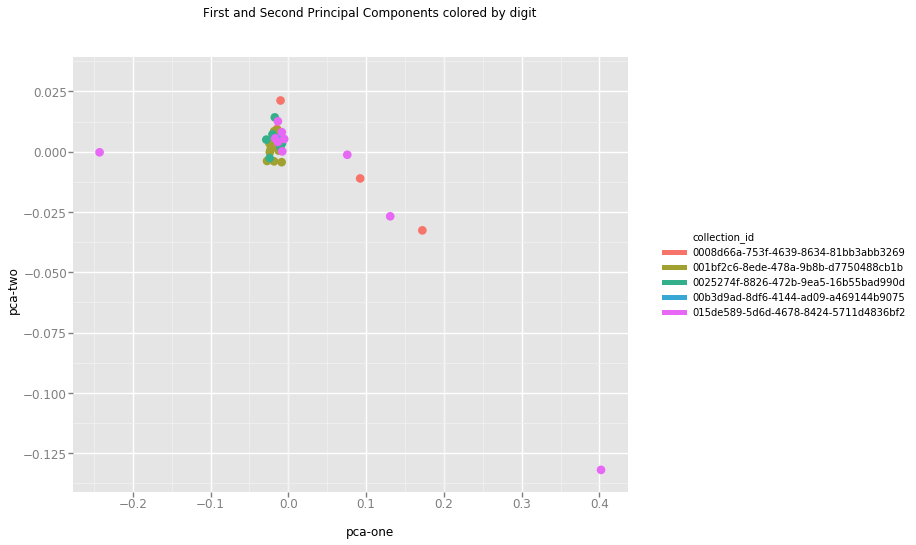

In [15]:
# import ggplot
from ggplot import *

chart = ggplot( data.loc[:,:], aes(x='pca-one', y='pca-two', color='collection_id') ) \
        + geom_point(size=75,alpha=1) \
        + ggtitle("First and Second Principal Components colored by digit")

chart.show()

In [16]:
# dimension reduction using t_sne

# number of epochs
n_iter = 300

# no of dimensions to reduce to
n_components = 3

# start time of pca to estimate time calculation
time_start = time.time()

# tsne dimension reduction
tsne = TSNE(n_components, verbose=1, perplexity=40,n_iter = n_iter )
tsne_results = tsne.fit_transform(df.loc[:,feat_cols].values)

#time elapsed to compute tsne
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 35965 samples in 0.182s...
[t-SNE] Computed neighbors for 35965 samples in 301.642s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35965
[t-SNE] Computed conditional probabilities for sample 2000 / 35965
[t-SNE] Computed conditional probabilities for sample 3000 / 35965
[t-SNE] Computed conditional probabilities for sample 4000 / 35965
[t-SNE] Computed conditional probabilities for sample 5000 / 35965
[t-SNE] Computed conditional probabilities for sample 6000 / 35965
[t-SNE] Computed conditional probabilities for sample 7000 / 35965
[t-SNE] Computed conditional probabilities for sample 8000 / 35965
[t-SNE] Computed conditional probabilities for sample 9000 / 35965
[t-SNE] Computed conditional probabilities for sample 10000 / 35965
[t-SNE] Computed conditional probabilities for sample 11000 / 35965
[t-SNE] Computed conditional probabilities for sample 12000 / 35965
[t-SNE] Computed conditional probabilities for 

In [17]:
# extractiong resoures which are in collection list
data = df[df["isinCollectionList"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 2006 to 34083
Data columns (total 62 columns):
collection_id         38 non-null object
sequence_id           38 non-null int64
resource_id           38 non-null object
title                 38 non-null object
description           38 non-null object
is_deleted            38 non-null object
text                  38 non-null object
embeddings            38 non-null object
vec_1                 38 non-null float64
vec_2                 38 non-null float64
vec_3                 38 non-null float64
vec_4                 38 non-null float64
vec_5                 38 non-null float64
vec_6                 38 non-null float64
vec_7                 38 non-null float64
vec_8                 38 non-null float64
vec_9                 38 non-null float64
vec_10                38 non-null float64
vec_11                38 non-null float64
vec_12                38 non-null float64
vec_13                38 non-null float64
vec_14            

In [18]:
# plotting the tsne results in 2d space

data_tsne = data.loc[:,:].copy()
df['x-tsne'] = tsne_results[:,0]
df['y-tsne'] = tsne_results[:,1]
df['z-tsne'] = tsne_results[:,2]

# chart.save("tsne.png")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 2006 to 34083
Data columns (total 65 columns):
collection_id         38 non-null object
sequence_id           38 non-null int64
resource_id           38 non-null object
title                 38 non-null object
description           38 non-null object
is_deleted            38 non-null object
text                  38 non-null object
embeddings            38 non-null object
vec_1                 38 non-null float64
vec_2                 38 non-null float64
vec_3                 38 non-null float64
vec_4                 38 non-null float64
vec_5                 38 non-null float64
vec_6                 38 non-null float64
vec_7                 38 non-null float64
vec_8                 38 non-null float64
vec_9                 38 non-null float64
vec_10                38 non-null float64
vec_11                38 non-null float64
vec_12                38 non-null float64
vec_13                38 non-null float64
vec_14            

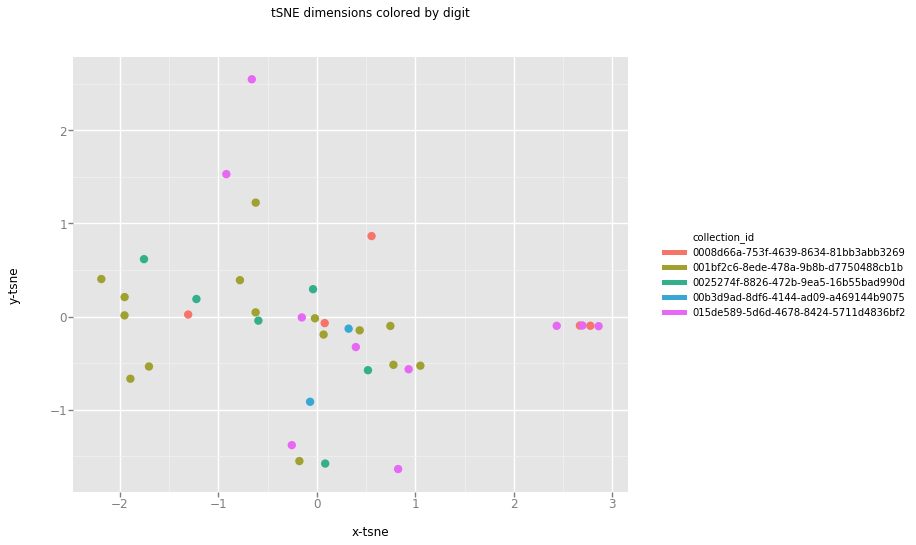

In [19]:
# extractiong resoures which are in collection list
data = df[df["isinCollectionList"]]
data.info()

chart = ggplot( data.loc[:,:], aes(x='x-tsne', y='y-tsne', color='collection_id') ) \
        + geom_point(size=70,alpha=1) \
        + ggtitle("tSNE dimensions colored by digit")

chart.show()


In [20]:
# # plotting of pca results in 3 dimension space

# fig = pyplot.figure(figsize=[10 ,10])
# ax = fig.add_subplot(111,projection='3d')

# sequence_containing_x_vals = data['pca-one']
# sequence_containing_y_vals = data['pca-two']
# sequence_containing_z_vals = data['pca-three']

# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')



# ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals ,c ='r',marker ='o')
# pyplot.show()

In [21]:
# # plotting of two results in 3 dimension space


# fig = pyplot.figure(figsize=[10 ,10])
# ax = fig.add_subplot(111,projection='3d')

# sequence_containing_x_vals = data_tsne['x-tsne']
# sequence_containing_y_vals = data_tsne['y-tsne']
# sequence_containing_z_vals = data_tsne['z-tsne']

# ax.set_xlabel('x-tsne')
# ax.set_ylabel('y-tsne')
# ax.set_zlabel('z-tsne')


# ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals ,c ='r',marker ='o')
# pyplot.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35965 entries, 0 to 35964
Data columns (total 65 columns):
collection_id         35965 non-null object
sequence_id           35965 non-null int64
resource_id           35965 non-null object
title                 35965 non-null object
description           35965 non-null object
is_deleted            35965 non-null object
text                  35965 non-null object
embeddings            35965 non-null object
vec_1                 35965 non-null float64
vec_2                 35965 non-null float64
vec_3                 35965 non-null float64
vec_4                 35965 non-null float64
vec_5                 35965 non-null float64
vec_6                 35965 non-null float64
vec_7                 35965 non-null float64
vec_8                 35965 non-null float64
vec_9                 35965 non-null float64
vec_10                35965 non-null float64
vec_11                35965 non-null float64
vec_12                35965 non-null float64


In [23]:
# savaing the data
df.to_csv('plotting_data1.csv')

In [5]:
# Loading Document plotting_data

df = pd.read_csv('./plotting_data1.csv')
df.sort_values(by=['collection_id', 'sequence_id'],inplace = True)
df.head(10)


,Unnamed: 0,collection_id,sequence_id,resource_id,title,description,is_deleted,text,embeddings,vec_1,...,vec_48,vec_49,vec_50,isinCollectionList,pca-one,pca-two,pca-three,x-tsne,y-tsne,z-tsne
5253,5253,0008d66a-753f-4639-8634-81bb3abb3269,1,231eb4ad-d0e8-4e94-a552-f8bd2358a47a,Solve the linear equation: _______,"<p><span style=""color: rgb(102, 102, 102); fon...",f,Solve the linear equation: _______ <p><span st...,[ 0.01574457 -0.01733002 -0.03295482 -0.014757...,0.015745,...,0.014440,0.013762,0.028355,True,0.172313,-0.032625,0.023212,2.775918,-0.099102,-0.519653
2861,2861,0008d66a-753f-4639-8634-81bb3abb3269,2,0b248202-12a9-405b-acd1-4ab8250e4198,"If , then _______","<p><span style=""color: rgb(102, 102, 102); fon...",f,"If , then _______ <p><span style=""color: rgb(1...",[ 0.00408272 -0.00397567 -0.01186745 -0.002194...,0.004083,...,0.009324,0.002865,0.022031,True,0.092378,-0.011098,0.021309,2.670049,-0.096853,-0.499818
2858,2858,0008d66a-753f-4639-8634-81bb3abb3269,3,2ee6f80f-0851-4cfa-b4bf-2655e9c46ab7,Solve the Linear equation: _______,"<p>Solve the Linear equation:<span class=""AM"">...",f,Solve the Linear equation: _______ <p>Solve th...,[-5.18063270e-03 3.30187171e-03 5.51503012e-...,-0.005181,...,-0.009695,-0.001456,-0.005791,True,-0.017501,0.002135,-0.002838,-1.305666,0.021699,0.242172
6855,6855,0008d66a-753f-4639-8634-81bb3abb3269,4,81c6995c-dd95-418e-a8c4-c22d8ccd32e9,Solve the linear equation: _______,"<p>Solve the linear equation:<span class=""AM"">...",f,Solve the linear equation: _______ <p>Solve th...,[ 0.00636359 0.00066306 0.00820493 -0.003582...,0.006364,...,0.009970,-0.000695,-0.007600,True,-0.014596,0.009436,-0.007515,0.080146,-0.070511,-0.014885
4909,4909,0008d66a-753f-4639-8634-81bb3abb3269,5,15a464a4-a2d8-41dd-b00e-ff7fea0aa720,"If , then _______","<p>If<span class=""AM""> <img src=""//mtex.gooru....",f,"If , then _______ <p>If<span class=""AM""> <img ...",[-3.2836965e-03 8.5281965e-05 -7.2107255e-03 ...,-0.003284,...,0.009087,-0.001563,-0.004437,True,-0.009971,0.021224,0.017154,0.555443,0.864393,-0.110851
11949,11949,001bf2c6-8ede-478a-9b8b-d7750488cb1b,1,1b922fae-619f-4f52-9551-663b3206e4e5,Lesson 11,I'll say an addition or subtraction sentence. ...,f,Lesson 11 I'll say an addition or subtraction ...,[ 0.00202825 0.00722599 0.00197263 0.003506...,0.002028,...,-0.006069,0.009256,-0.002520,True,-0.012378,0.000437,-0.009983,1.050874,-0.528188,-0.248014
12366,12366,001bf2c6-8ede-478a-9b8b-d7750488cb1b,2,8b9c50e6-e568-48f7-afee-91f46c8fb523,Subtracting Fractions from Whole Numbers,I'll say a subtraction sentence. You say the s...,f,Subtracting Fractions from Whole Numbers I'll ...,[ 0.00016098 -0.0001762 -0.00510739 0.001490...,0.000161,...,-0.002535,0.003230,0.008127,True,-0.011681,0.003459,-0.001563,-0.176954,-1.552744,0.029530
5968,5968,001bf2c6-8ede-478a-9b8b-d7750488cb1b,3,0882e4d2-a8c8-4ec4-b3f2-513dd9dd1930,Adding and Subtracting Fractions with Like Units,This fluency activity reviews adding and subtr...,f,Adding and Subtracting Fractions with Like Uni...,[-0.00479883 0.00623034 0.00710538 0.002699...,-0.004799,...,0.007800,0.002636,0.000418,True,-0.023754,-0.000234,0.008676,-0.780364,0.390589,0.137053
5972,5972,001bf2c6-8ede-478a-9b8b-d7750488cb1b,4,0598accc-df55-4f03-9bb3-09bdd9a4acc6,Application Problem,Talk with your partner for 30 seconds about st...,f,Application Problem Talk with your partner for...,[ 2.5977287e-03 1.4013381e-03 -3.9051711e-03 ...,0.002598,...,-0.009066,-0.007775,-0.000830,True,-0.011346,0.005320,-0.008114,0.434700,-0.148059,-0.071501
34083,34083,001bf2c6-8ede-478a-9b8b-d7750488cb1b,5,8587312a-fd96-4256-928b-230462bbc65d,Lesson 11: Concept Development,Tell your partner how you might solve it.,f,Lesson 11: Concept Development Tell your partn...,[-0.00792619 -0.0096992 -0.00882453 -0.008186...,-0.007926,...,-0.001243,0.001907,0.003325,True,-0.024252,0.003441,0.010705,-1.950854,0.208991,0.359932


In [6]:
data = df[df.isinCollectionList == 1]

In [15]:
x1 = data[data.collection_id == "0008d66a-753f-4639-8634-81bb3abb3269"]["pca-one"]
y1 = data[data.collection_id == "0008d66a-753f-4639-8634-81bb3abb3269"]["pca-two"]
l1 = range(0,len(y1))

x2 = data[data.collection_id == "001bf2c6-8ede-478a-9b8b-d7750488cb1b"]["pca-one"]
y2 = data[data.collection_id == "001bf2c6-8ede-478a-9b8b-d7750488cb1b"]["pca-two"]
l2 = range(0,len(y2))

x3 = data[data.collection_id == "0025274f-8826-472b-9ea5-16b55bad990d"]["pca-one"]
y3 = data[data.collection_id == "0025274f-8826-472b-9ea5-16b55bad990d"]["pca-two"]
l3 = range(0,len(y3))

x4 = data[data.collection_id == "00b3d9ad-8df6-4144-ad09-a469144b9075"]["pca-one"]
y4 = data[data.collection_id == "00b3d9ad-8df6-4144-ad09-a469144b9075"]["pca-two"]
l4 = range(0,len(y4))


x5 = data[data.collection_id == "015de589-5d6d-4678-8424-5711d4836bf2"]["pca-one"]
y5 = data[data.collection_id == "015de589-5d6d-4678-8424-5711d4836bf2"]["pca-two"]
l5 = range(0,len(y5))

# x1 = data[data.collection_id == "0008d66a-753f-4639-8634-81bb3abb3269"]["x-tsne"]
# y1 = data[data.collection_id == "0008d66a-753f-4639-8634-81bb3abb3269"]["y-tsne"]

# x2 = data[data.collection_id == "001bf2c6-8ede-478a-9b8b-d7750488cb1b"]["x-tsne"]
# y2 = data[data.collection_id == "001bf2c6-8ede-478a-9b8b-d7750488cb1b"]["y-tsne"]

# x3 = data[data.collection_id == "0025274f-8826-472b-9ea5-16b55bad990d"]["pca-one"]
# y3 = data[data.collection_id == "0025274f-8826-472b-9ea5-16b55bad990d"]["y-tsne"]

# x4 = data[data.collection_id == "00b3d9ad-8df6-4144-ad09-a469144b9075"]["x-tsne"]
# y4 = data[data.collection_id == "00b3d9ad-8df6-4144-ad09-a469144b9075"]["y-tsne"]


# x5 = data[data.collection_id == "015de589-5d6d-4678-8424-5711d4836bf2"]["x-tsne"]
# y5 = data[data.collection_id == "015de589-5d6d-4678-8424-5711d4836bf2"]["y-tsne"]




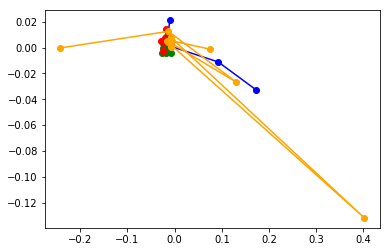

In [24]:
plt.plot( x1,y1, marker='o', color='blue')
# for i in range(0,len(y1)):
#     plt.annotate(str(i+1), (x1.values[i],y1.values[i]))
    
plt.plot( x2,y2, marker='o', color='green')
plt.plot( x3,y3, marker='o', color='red')
plt.plot( x4,y4, marker='o', color='darkviolet')
plt.plot( x5,y5, marker='o', color='orange')

plt.show()